In Part 1 of this project, we are looking to apply ESG topics to various countries across the world, and create visualizations representing what their country looks like over a period of time. ESG, or Environmental, Social, and Governance, is a method which investors use to understand where their money goes, and how best to help the world with it. Especially with the rise of global warming, and the COVID-19 pandemic we are only now leaving behind, ESG topics are especially important, not only to investors, but the world as a whole, which is what we are looking at in this project. We hope that you enjoy!

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt



This analysis looks at the top 3 and top bottom 3 countries for various ESG (Environmental, Social, and Governance) criterion. The data is collected from the World Bank, and the rankings for the top/bottom 3 are from Robeco (link: https://www.robeco.com/us/key-strengths/sustainable-investing/country-ranking/)

In [2]:
ESGData = pd.read_csv('ESGData.csv')
ESGSeries = pd.read_csv('ESGSeries.csv')
ESGCountry = pd.read_csv('ESGCountry.csv')
ESGSeries_Time = pd.read_csv('ESGSeries-Time.csv')
ESGCountry_Series = pd.read_csv('ESGCountry-Series.csv')
ESGFootNote = pd.read_csv('ESGFootNote.csv')

In [3]:
ESGData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2050,Unnamed: 66
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN,NaN,NaN
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.641062,10.437876,6.277652,5.261868,6.385551,8.190277,NaN,NaN,NaN,NaN
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.055593,0.079402,0.086177,0.076670,0.085885,0.047916,NaN,NaN,NaN,NaN
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,27.835643,27.826564,27.845522,27.847925,27.866972,...,36.534503,36.607475,36.624759,36.610850,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
col = ESGData.columns
print(col)
y = ESGData.loc[19]

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2050',
       'Unnamed: 66'],
      dtype='object')


In [5]:
print(ESGData.loc[19])

Country Name                                    Arab World
Country Code                                           ARB
Indicator Name    Fertility rate, total (births per woman)
Indicator Code                              SP.DYN.TFRT.IN
1960                                               6.97726
1961                                               6.99863
1962                                               7.01872
1963                                               7.03504
1964                                               7.04569
1965                                               7.04904
1966                                               7.04259
1967                                               7.02689
1968                                               7.00219
1969                                               6.96788
1970                                               6.92498
1971                                               6.87484
1972                                               6.820

In [6]:
list = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '2019', '2020', '2050', 'Unnamed: 66']
updated = ESGData.drop(list, axis = 1)
updated.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.809630,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,84.270921,86.959991,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856
2,Arab World,ARB,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,8.096032,8.368431,8.451037,8.247409,7.712396,8.064746,...,8.721330,9.966140,13.002144,12.850205,11.641062,10.437876,6.277652,5.261868,6.385551,8.190277
3,Arab World,ARB,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,0.052709,0.087444,0.070674,0.054602,0.058116,0.080551,...,0.051040,0.052809,0.060245,0.061942,0.055593,0.079402,0.086177,0.076670,0.085885,0.047916
4,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,31.534601,31.639377,31.741282,32.458657,33.133486,33.742542,...,36.372261,36.425990,36.440808,36.472300,36.534503,36.607475,36.624759,36.610850,NaN,NaN


In this block of code, we remove all of the years for which <40% of the data is valid, as that prevents us from being able to get a good understanding of various criterion that we are looking for.

In [7]:
new = updated.columns
newlist = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986','1987', '1988', '1989', '2019', '2020', '2050', 'Unnamed: 66']
updated = ESGData.drop(newlist, axis = 1)
updated = updated.transpose()

# Top 3 ESG
sweden = updated[[14214, 14219, 14223, 14237, 14251]].reset_index(drop=True)
sweden = sweden.rename({14214: 'CO2 emissions (metric tons per capita)', 14219: 'Electricity production from coal sources (% of total)', 14223: 'Fertility rate, total (births per woman)', 14237: 'Life expectancy at birth, total (years)', 14251: 'Population ages 65 and above (% of total population)'}, axis=1)

finland = updated[[7045, 7050, 7054, 7068, 7082]].reset_index(drop=True)
finland = finland.rename({7045: 'CO2 emissions (metric tons per capita)', 7050: 'Electricity production from coal sources (% of total)', 7054: 'Fertility rate, total (births per woman)', 7068: 'Life expectancy at birth, total (years)', 7082: 'Population ages 65 and above (% of total population)'}, axis=1)

norway = updated[[11735, 11740, 11744, 11758, 11772]].reset_index(drop=True)
norway = norway.rename({11735: 'CO2 emissions (metric tons per capita)', 11740: 'Electricity production from coal sources (% of total)', 11744: 'Fertility rate, total (births per woman)', 11758: 'Life expectancy at birth, total (years)', 11772: 'Population ages 65 and above (% of total population)'}, axis=1)

# Bottom 3 ESG
ssd = updated[[13678, 13683, 13687, 13701, 13715]].reset_index(drop=True)
ssd = ssd.rename({13678: 'CO2 emissions (metric tons per capita)', 13683: 'Electricity production from coal sources (% of total)', 13687: 'Fertility rate, total (births per woman)', 13701: 'Life expectancy at birth, total (years)', 13715: 'Population ages 65 and above (% of total population)'}, axis=1)

car = updated[[5236, 5241, 5245, 5259, 5273]].reset_index(drop=True)
car = car.rename({5236: 'CO2 emissions (metric tons per capita)', 5241: 'Electricity production from coal sources (% of total)', 5245: 'Fertility rate, total (births per woman)', 5259: 'Life expectancy at birth, total (years)', 5273: 'Population ages 65 and above (% of total population)'}, axis=1)

yemen = updated[[15822, 15827, 15831, 15845, 15859]].reset_index(drop=True)
yemen = yemen.rename({15822: 'CO2 emissions (metric tons per capita)', 15827: 'Electricity production from coal sources (% of total)', 15831: 'Fertility rate, total (births per woman)', 15845: 'Life expectancy at birth, total (years)', 15859: 'Population ages 65 and above (% of total population)'}, axis=1)

In this block of code, we take the large CSV file, and transpose it, which allows us to better single out specific criterion that we may be looking at, instead of being restricted to singling out years. From here, we choose 5 measures we felt best represented a countries ESG: CO2 emissions, Electricity production from coal, Fertility rate, Life expectancy at birth, and % of the population ages 65 and above.

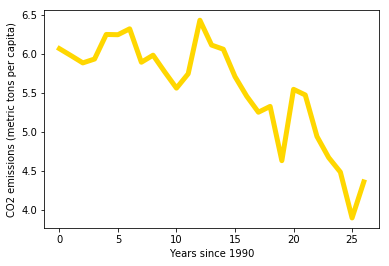

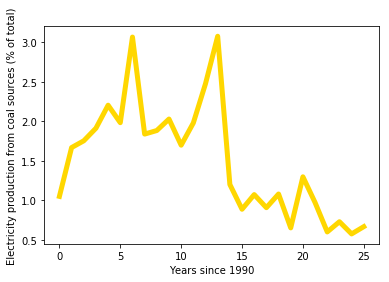

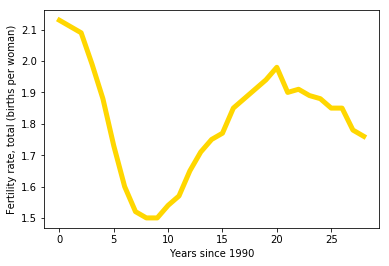

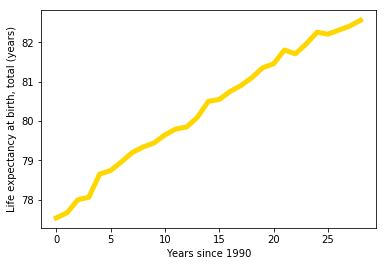

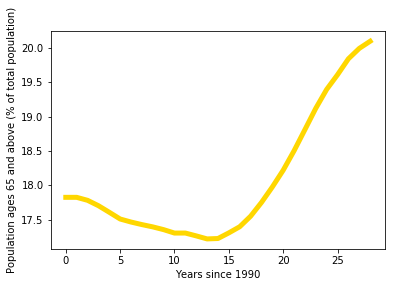

In [8]:
# Sweden Graphs
plt.plot(sweden.index, sweden['CO2 emissions (metric tons per capita)'], color = 'gold', linewidth = 5)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(sweden.index, sweden['Electricity production from coal sources (% of total)'], color = 'gold', linewidth = 5)
plt.ylabel('Electricity production from coal sources (% of total)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(sweden.index, sweden['Fertility rate, total (births per woman)'], color = 'gold', linewidth = 5)
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(sweden.index, sweden['Life expectancy at birth, total (years)'], color = 'gold', linewidth = 5)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(sweden.index, sweden['Population ages 65 and above (% of total population)'], color = 'gold', linewidth = 5)
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.show()

These are graphs representing Sweden's metrics.

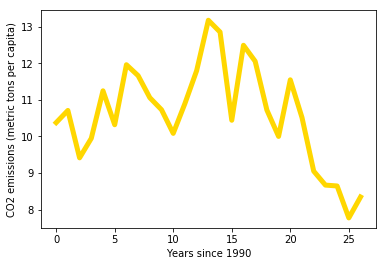

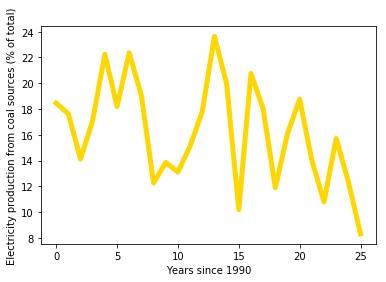

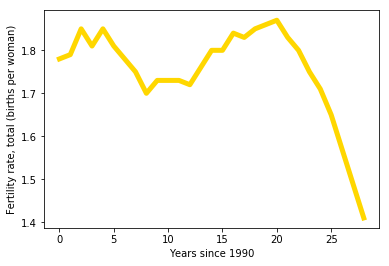

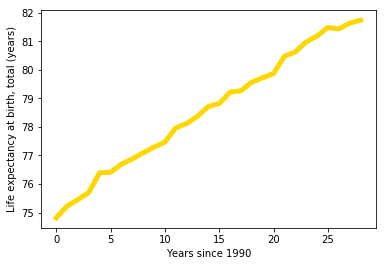

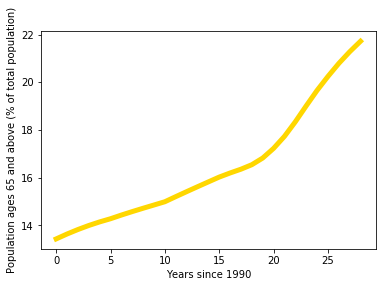

In [9]:
# Finland Graphs
plt.plot(finland.index, finland['CO2 emissions (metric tons per capita)'], color = 'gold', linewidth = 5)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(finland.index, finland['Electricity production from coal sources (% of total)'], color = 'gold', linewidth = 5)
plt.ylabel('Electricity production from coal sources (% of total)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(finland.index, finland['Fertility rate, total (births per woman)'], color = 'gold', linewidth = 5)
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(finland.index, finland['Life expectancy at birth, total (years)'], color = 'gold', linewidth = 5)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(finland.index, finland['Population ages 65 and above (% of total population)'], color = 'gold', linewidth = 5)
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.show()

These are graphs representing Finland's metrics.

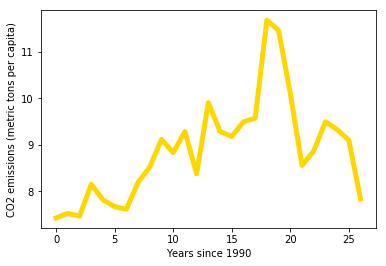

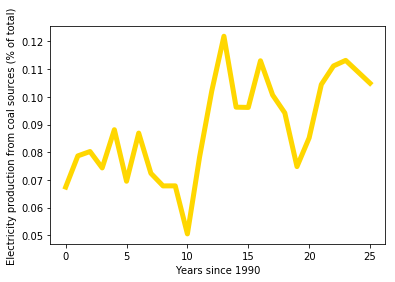

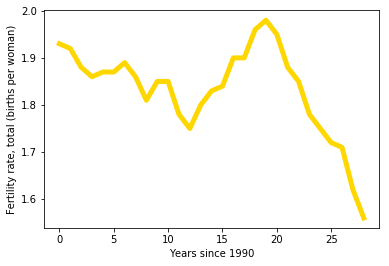

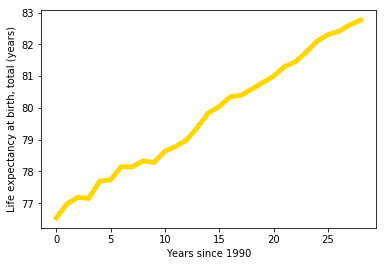

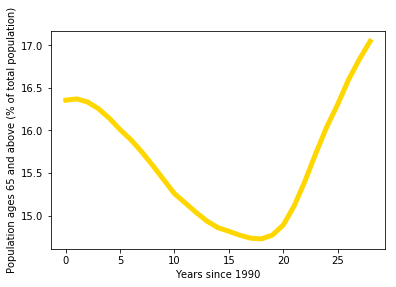

In [10]:
# Norway Graphs
plt.plot(norway.index, norway['CO2 emissions (metric tons per capita)'], color = 'gold', linewidth = 5)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(norway.index, norway['Electricity production from coal sources (% of total)'], color = 'gold', linewidth = 5)
plt.ylabel('Electricity production from coal sources (% of total)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(norway.index, norway['Fertility rate, total (births per woman)'], color = 'gold', linewidth = 5)
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(norway.index, norway['Life expectancy at birth, total (years)'], color = 'gold', linewidth = 5)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(norway.index, norway['Population ages 65 and above (% of total population)'], color = 'gold', linewidth = 5)
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.show()

These are graphs representing Norway's metrics.

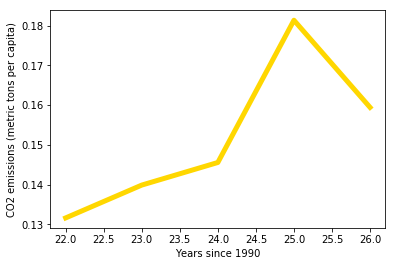

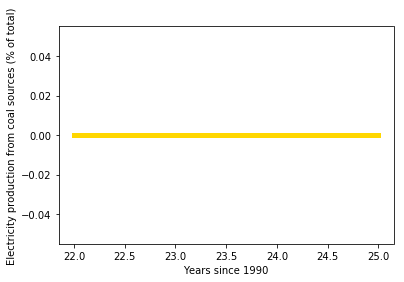

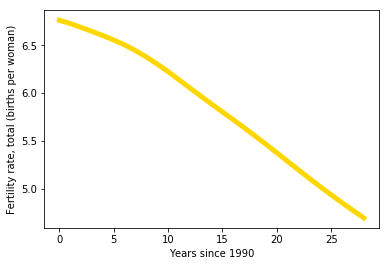

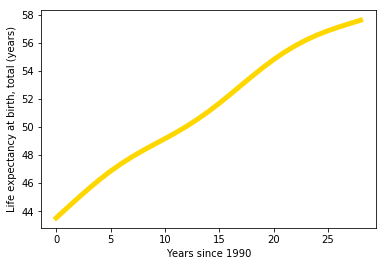

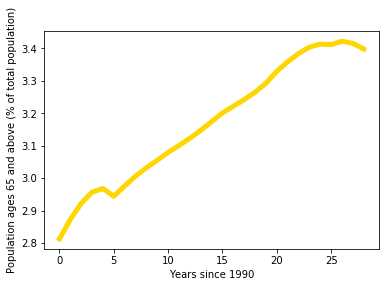

In [11]:
# South Sudan Graphs
plt.plot(ssd.index, ssd['CO2 emissions (metric tons per capita)'], color = 'gold', linewidth = 5)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(ssd.index, ssd['Electricity production from coal sources (% of total)'], color = 'gold', linewidth = 5)
plt.ylabel('Electricity production from coal sources (% of total)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(ssd.index, ssd['Fertility rate, total (births per woman)'], color = 'gold', linewidth = 5)
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(ssd.index, ssd['Life expectancy at birth, total (years)'], color = 'gold', linewidth = 5)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(ssd.index, ssd['Population ages 65 and above (% of total population)'], color = 'gold', linewidth = 5)
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.show()

These are graphs representing South Sudan's metrics.

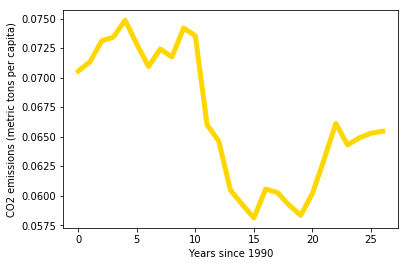

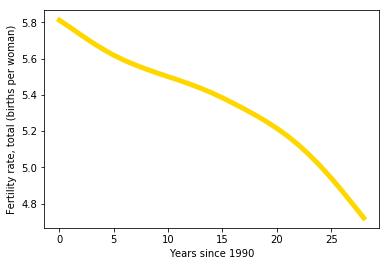

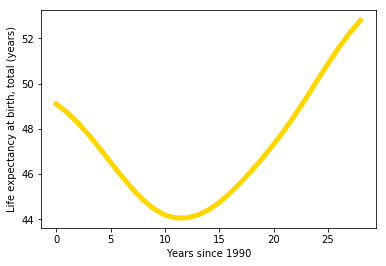

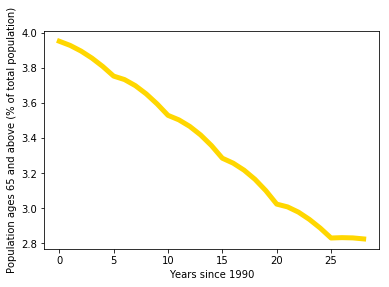

In [12]:
# Central African Republic Graphs
plt.plot(car.index, car['CO2 emissions (metric tons per capita)'], color = 'gold', linewidth = 5)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(car.index, car['Fertility rate, total (births per woman)'], color = 'gold', linewidth = 5)
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(car.index, car['Life expectancy at birth, total (years)'], color = 'gold', linewidth = 5)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(car.index, car['Population ages 65 and above (% of total population)'], color = 'gold', linewidth = 5)
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.show()

These are graphs representing the Central African Republic's metrics.

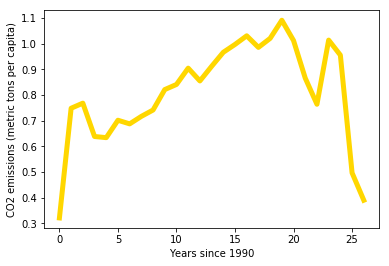

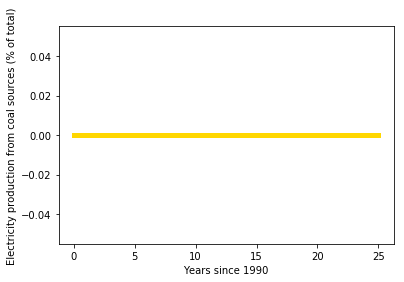

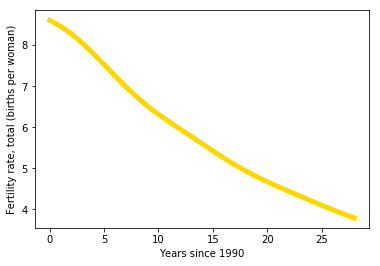

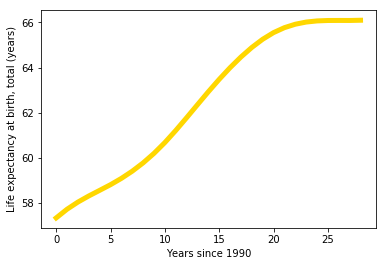

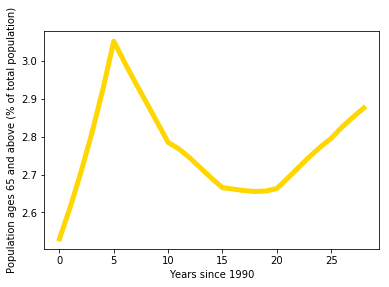

In [13]:
#Yemen Graphs
plt.plot(yemen.index, yemen['CO2 emissions (metric tons per capita)'], color = 'gold', linewidth = 5)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(yemen.index, yemen['Electricity production from coal sources (% of total)'], color = 'gold', linewidth = 5)
plt.ylabel('Electricity production from coal sources (% of total)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(yemen.index, yemen['Fertility rate, total (births per woman)'], color = 'gold', linewidth = 5)
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(yemen.index, yemen['Life expectancy at birth, total (years)'], color = 'gold', linewidth = 5)
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.show()

plt.plot(yemen.index, yemen['Population ages 65 and above (% of total population)'], color = 'gold', linewidth = 5)
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.show()

These are graphs representing Yemen's metrics.

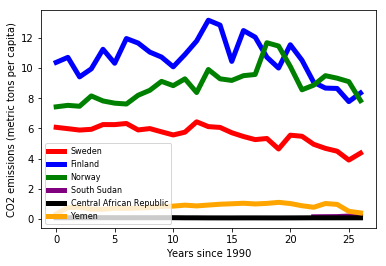

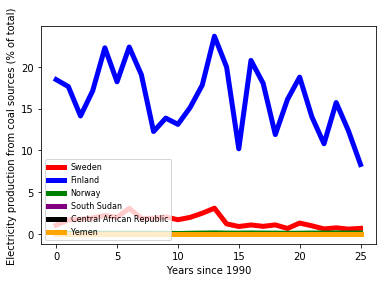

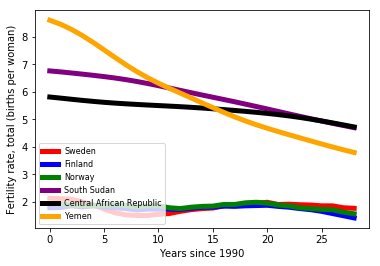

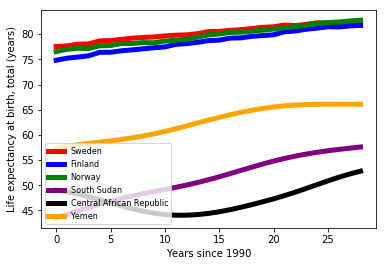

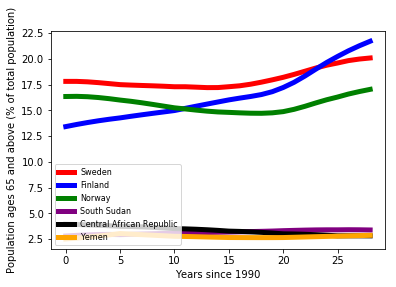

In [14]:
#Combined
plt.plot(sweden.index, sweden['CO2 emissions (metric tons per capita)'], color = 'red', linewidth = 5, label = "Sweden")
plt.plot(finland.index, finland['CO2 emissions (metric tons per capita)'], color = 'blue', linewidth = 5, label = "Finland")
plt.plot(norway.index, norway['CO2 emissions (metric tons per capita)'], color = 'green', linewidth = 5, label = "Norway")
plt.plot(ssd.index, ssd['CO2 emissions (metric tons per capita)'], color = 'purple', linewidth = 5, label = "South Sudan")
plt.plot(car.index, car['CO2 emissions (metric tons per capita)'], color = 'black', linewidth = 5, label = "Central African Republic")
plt.plot(yemen.index, yemen['CO2 emissions (metric tons per capita)'], color = 'orange', linewidth = 5, label = "Yemen")
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('Years since 1990')
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

plt.plot(sweden.index, sweden['Electricity production from coal sources (% of total)'], color = 'red', linewidth = 5, label = "Sweden")
plt.plot(finland.index, finland['Electricity production from coal sources (% of total)'], color = 'blue', linewidth = 5, label = "Finland")
plt.plot(norway.index, norway['Electricity production from coal sources (% of total)'], color = 'green', linewidth = 5, label = "Norway")
plt.plot(ssd.index, ssd['Electricity production from coal sources (% of total)'], color = 'purple', linewidth = 5, label = "South Sudan")
plt.plot(car.index, car['Electricity production from coal sources (% of total)'], color = 'black', linewidth = 5, label = "Central African Republic")
plt.plot(yemen.index, yemen['Electricity production from coal sources (% of total)'], color = 'orange', linewidth = 5, label = "Yemen")
plt.ylabel('Electricity production from coal sources (% of total)')
plt.xlabel('Years since 1990')
plt.legend(loc="lower left", prop={'size': 8})
plt.show()


plt.plot(sweden.index, sweden['Fertility rate, total (births per woman)'], color = 'red', linewidth = 5, label = "Sweden")
plt.plot(finland.index, finland['Fertility rate, total (births per woman)'], color = 'blue', linewidth = 5, label = "Finland")
plt.plot(norway.index, norway['Fertility rate, total (births per woman)'], color = 'green', linewidth = 5, label = "Norway")
plt.plot(ssd.index, ssd['Fertility rate, total (births per woman)'], color = 'purple', linewidth = 5, label = "South Sudan")
plt.plot(car.index, car['Fertility rate, total (births per woman)'], color = 'black', linewidth = 5, label = "Central African Republic")
plt.plot(yemen.index, yemen['Fertility rate, total (births per woman)'], color = 'orange', linewidth = 5, label = "Yemen")
plt.ylabel('Fertility rate, total (births per woman)')
plt.xlabel('Years since 1990')
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

plt.plot(sweden.index, sweden['Life expectancy at birth, total (years)'], color = 'red', linewidth = 5, label = "Sweden")
plt.plot(finland.index, finland['Life expectancy at birth, total (years)'], color = 'blue', linewidth = 5, label = "Finland")
plt.plot(norway.index, norway['Life expectancy at birth, total (years)'], color = 'green', linewidth = 5, label = "Norway")
plt.plot(ssd.index, ssd['Life expectancy at birth, total (years)'], color = 'purple', linewidth = 5, label = "South Sudan")
plt.plot(car.index, car['Life expectancy at birth, total (years)'], color = 'black', linewidth = 5, label = "Central African Republic")
plt.plot(yemen.index, yemen['Life expectancy at birth, total (years)'], color = 'orange', linewidth = 5, label = "Yemen")
plt.ylabel('Life expectancy at birth, total (years)')
plt.xlabel('Years since 1990')
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

plt.plot(sweden.index, sweden['Population ages 65 and above (% of total population)'], color = 'red', linewidth = 5, label = "Sweden")
plt.plot(finland.index, finland['Population ages 65 and above (% of total population)'], color = 'blue', linewidth = 5, label = "Finland")
plt.plot(norway.index, norway['Population ages 65 and above (% of total population)'], color = 'green', linewidth = 5, label = "Norway")
plt.plot(ssd.index, ssd['Population ages 65 and above (% of total population)'], color = 'purple', linewidth = 5, label = "South Sudan")
plt.plot(car.index, car['Population ages 65 and above (% of total population)'], color = 'black', linewidth = 5, label = "Central African Republic")
plt.plot(yemen.index, yemen['Population ages 65 and above (% of total population)'], color = 'orange', linewidth = 5, label = "Yemen")
plt.ylabel('Population ages 65 and above (% of total population)')
plt.xlabel('Years since 1990')
plt.legend(loc="lower left", prop={'size': 8})
plt.show()

In order to better understand how the SGE scores play out, we plotted all 5 metrics for each of the 6 countries on the same graph, so you can see for yourself how they exist. For example, we can see that all 3 Scandinavian countries which top the chart also have high life expectancy's at birth, compared to their counterparts which fall at the bottom of the scores.

We hope that this project gave you some insight into how SGE affects countries, and what metrics fall under this scope. Countries are a great model to introduce the topic with, as every action that they perform falls under this umbrella, and it provides a unique lens through which we can weigh how effective specific policies and actions are, and create successful solutions based on this. Similarly, we can pivot to looking at companies, and although the core metrics may be different, looking at the concept as a whole allows us to create powerful predictions on a company's success based on their ESG score - something we look at in Part 2.

Link to Part 2: https://www.kaggle.com/kingkarth/esg-companies